In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np

## ELO Rating vs Average Move Time

In [3]:
avg_move_df = pd.read_csv("AnalysisSoftware/Output/2020JanuaryRankAnalysis_AverageMoveTimes", names=["ranking", "avg_move_time"])
avg_move_df.head()

,ranking,avg_move_time
0,1460,0.008565
1,1865,0.015624
2,1771,0.032562
3,1848,0.007318
4,1526,0.008046


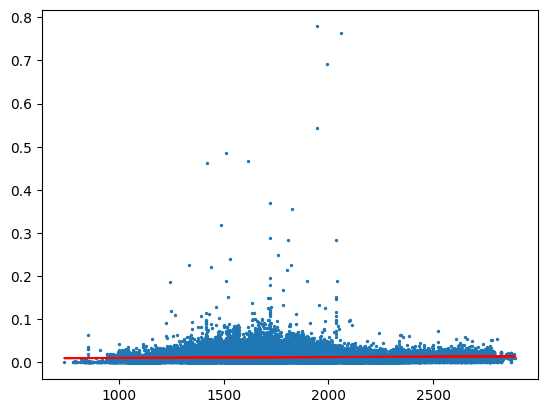

In [4]:
def line(x):
  return slope * x + intercept

x_avg_move = avg_move_df["ranking"]
y_avg_move = avg_move_df["avg_move_time"]

slope, intercept, r, p, std_err = stats.linregress(x_avg_move, y_avg_move)

avg_move_model = list(map(line, x_avg_move))

plt.scatter(x_avg_move, y_avg_move, s=2)
plt.plot(x_avg_move, avg_move_model, color="red")
plt.show()

In [5]:
move_table = []
for i in [500, 1000, 1500, 2000, 2500, 3000]:
    move_table.append([i, str(avg_move_model[i])])

move_print = pd.DataFrame(move_table, columns=["ranking", "std_avg_move_time"])
move_print.head(6)

,ranking,std_avg_move_time
0,500,0.01261648167052995
1,1000,0.0139056453023352
2,1500,0.01206257497246072
3,2000,0.012681531211584343
4,2500,0.011699874501127134
5,3000,0.011069091072720895


## Centipawn Score vs Move Time

In [6]:
score_df = pd.read_csv("AnalysisSoftware/Output/2020JanuaryScoreAnalysis_AllMoveTimes", names=["avg_move_time", "centipawn_score"])
score_df.head()

,avg_move_time,centipawn_score
0,0.001687,-48.0
1,0.002021,17.0
2,0.001348,-26.0
3,0.002172,10.0
4,0.002148,31.0


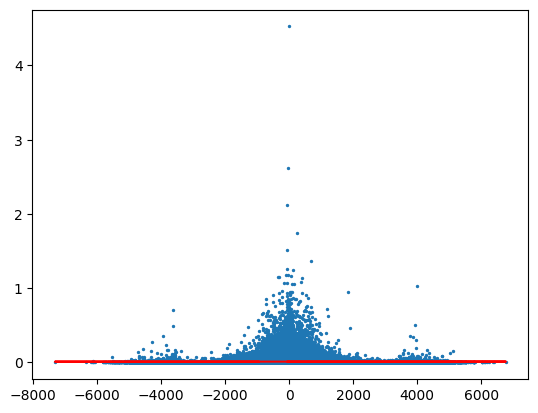

In [7]:
def test(x, a, b):
    return a * np.sin(b * x)

nonzero_df = score_df.loc[abs(score_df['centipawn_score']) < 10000]

x_score = nonzero_df["centipawn_score"]
y_score = nonzero_df["avg_move_time"]

slope, intercept, r, p, std_err = stats.linregress(x_score, y_score)
param, param_cov = curve_fit(test, x_score, y_score)

score_model = list(map(line, x_score))

plt.scatter(x_score, y_score, s=2)
plt.plot(x_score, score_model, color="red")

plt.show()

In [8]:
score_table = []
for i in [-4000, -3500, -3000, -2500, -2000, -1500, -1000, -500, 0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]:
    score_table.append([i, str(score_model[i])])

score_print = pd.DataFrame(score_table, columns=["centipawn_score", "std_avg_move_time"])
score_print.head(17)

,centipawn_score,std_avg_move_time
0,-4000,0.011612771058440805
1,-3500,0.011552138108435975
2,-3000,0.011576541284318034
3,-2500,0.011579829655536182
4,-2000,0.01160082907875384
5,-1500,0.011579079676135553
6,-1000,0.011599156047783202
7,-500,0.011606598151066383
8,0,0.011578041243119295
9,500,0.011578387387458047
